In [71]:
%pip install pandas matplotlib seaborn sklearn torch
%pip install "numpy<2" 

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


## 📌 Introduction
This notebook focuses on predicting hotel booking prices based on various features.

### 🔹 Steps Covered:
- Data preprocessing
- Feature engineering
- Model training & evaluation
- Feature importance analysis



# Hotel Booking Price Prediction Analysis

## Project Overview
This notebook analyzes hotel booking data in New York City to predict prices and understand key factors affecting hotel rates. The analysis includes:
- Data preprocessing and cleaning
- Feature engineering
- Exploratory data analysis
- Model development and evaluation

## Dependencies
We'll use the following libraries:
- pandas & numpy for data manipulation
- sklearn for machine learning models
- matplotlib & seaborn for visualization
- torch for deep learning models


## 🛠️ Libraries Import
We use the following libraries:
- `pandas` & `numpy`: Data manipulation
- `sklearn`: Machine learning models
- `matplotlib` & `seaborn`: Visualization
- `torch`: Deep learning

Let's import them now.

In [91]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 📂 Loading and Cleaning Data
We load the dataset and remove missing values in critical features:
- `review_score`
- `is_apartment`
- `breakfast_included`

This ensures clean data for modeling.

## Data Loading and Initial Preprocessing
We load the preprocessed bookings dataset from CSV and perform initial cleaning by removing rows with missing values in key features:
- review_score
- is_apartment
- breakfast_included

This ensures we have complete data for our core analysis features.

## 🔍 Exploratory Data Analysis (EDA)
We explore data distributions and relationships between features.

**Key Steps:**
- Summary statistics
- Visualizing price distributions
- Correlation heatmap

Let's analyze!

In [73]:
# Load the dataset
file_path = "./proccessedBookings.csv"
df = pd.read_csv(file_path)


df = df.dropna(subset=['review_score'])

### 📊 Interpreting EDA Results
- The **review score distribution** helps us see if most hotels have high or low ratings.
- The **price histogram** highlights whether there are price outliers.
- A **correlation heatmap** shows how different features (e.g., location, reviews) affect price.

Key insights:
- If price distribution is skewed, we might need to apply **log transformation**.
- Strong correlation between review scores and price suggests higher-rated hotels charge more.
- Weak correlation? Then review score alone may not be a great predictor of price.

## 🏗️ Feature Engineering
We prepare features for modeling, including:
- Normalization
- One-hot encoding
- Creating new features

This step enhances model performance.

In [74]:
# Feature Engineering
df['review_score'] = df['review_score'].astype(int)
df['location_score'] = (df['location_score']).fillna(df['location_score'].mean()).astype(int)
df['is_apartment'] = (df['is_apartment']).fillna(False).astype(int)
df['breakfast_included'] = (df['breakfast_included']).fillna(False).astype(int)

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/2090258701.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_apartment'] = (df['is_apartment']).fillna(False).astype(int)
C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/2090258701.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['breakfast_included'] = (df['breakfast_included']).fillna(False).astype(int)


## 🤖 Model Training & Evaluation
We train and evaluate multiple regression models:
- **Linear Regression**
- **Decision Tree Regressor**
- **Gaussian Process Regressor**
- **Neural Networks (Deep Learning)**

We'll assess them using RMSE, MAE, and R².

### 📉 Understanding Model Performance
- **Residual plots**: If the errors are randomly distributed, the model is unbiased. Patterns in residuals? The model might be missing something!
- **Feature importance**: Helps us understand what impacts price the most.

Key takeaways:
- If residuals show a trend, we may need to add more features or try **non-linear models**.
- Feature importance tells us whether **review scores, location, or amenities** drive pricing the most.

In [75]:
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], format='%Y-%m-%d')  # Correct format
df['checkin_date'] = df['snapshot_date'] + pd.to_timedelta(df['time_to_travel'], unit='D')  # Add days
df['checkin_day'] = df['checkin_date'].dt.day  # Extract day of the month

### 🔥 Final Thoughts & Next Steps
Now that we've trained models and analyzed errors, we can:
- **Improve models** by tuning hyperparameters (e.g., adjusting tree depth, learning rates).
- **Try ensemble methods** like Random Forest to boost performance.
- **Use external datasets** (e.g., seasonality data) to refine predictions.

**What worked best?**
- If deep learning outperformed other models, it means our data is complex and benefits from non-linear representations.
- If a simple linear model did well, then pricing is relatively predictable with basic features.

## 📊 Model Performance Analysis
We analyze errors and feature importance using:
- Residual plots
- Feature importance rankings

This helps in understanding key price determinants.

In [76]:
df['is_weekend'] = df['checkin_date'].dt.weekday.apply(lambda x: 1 if x in [1,6,7] else 0) 
df['days_to_end_of_month'] = df['checkin_day'].apply(lambda x: 30 - x)  # Days left to the end of the month
display(df.head())

,Unnamed: 0.1,Unnamed: 0,name,original_price,discounted_price,discount,review_score,review_title,number_of_reviews,star_rating,...,"neighborhood_SoHo, New York","neighborhood_Tribeca, New York","neighborhood_Union Square, New York","neighborhood_Upper East Side, New York","neighborhood_Upper West Side, New York","neighborhood_Washington Heights, New York",checkin_date,checkin_day,is_weekend,days_to_end_of_month
0,0,0.0,Iroquois New York Times Square,292.0,218.0,True,8,4.0,2625.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2025-02-03,3,0,27
1,1,1.0,Four Points by Sheraton New York Downtown,130.0,111.0,True,7,3.0,1987.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2025-02-03,3,0,27
2,2,2.0,"The Mayfair Hotel Times Square, Ascend Hotel C...",141.0,141.0,False,8,5.0,1895.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2025-02-03,3,0,27
3,3,3.0,The Washington by LuxUrban,160.0,160.0,False,7,3.0,9442.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2025-02-03,3,0,27
4,4,4.0,Hampton Inn by Hilton New York Times Square,152.0,152.0,False,7,3.0,2432.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2025-02-03,3,0,27


## 🎯 Conclusion & Next Steps
We summarize key insights and suggest improvements for future work.

In [77]:
df['room_type_hash'] = df['room_type'].map(lambda x: hash(x) % 1000)
df['name_hash'] = df['name'].map(lambda x: hash(x) % 1000)

## Feature Engineering
Several transformations are applied to prepare the data:

### Categorical Features
- Converting review scores to integer type
- Converting boolean features (is_apartment, breakfast_included) to binary (0/1)
- Handling missing location scores by filling with mean review scores

### Temporal Features
- Converting snapshot dates to datetime format
- Calculating check-in dates based on time_to_travel
- Extracting day of month for check-in dates

These transformations help capture important patterns in the data while ensuring compatibility with our modeling approaches.

In [78]:
# Define Features and Target
X = df[['time_to_travel', 'length_of_stay','review_score', 'location_score','is_apartment','breakfast_included', 'days_to_end_of_month', 'is_weekend','room_type_hash','name_hash']]  # Features
y = df['discounted_price_per_night']  # Target Variable

In [79]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
# Normalize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [81]:
# Train Multiple Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree depth 5': DecisionTreeRegressor(max_depth=5),
    'Decision Tree depth 10': DecisionTreeRegressor(max_depth=10),
    # 'Gaussian Process (RBF)': GaussianProcessRegressor(kernel=RBF(1.0)),
    # 'Gaussian Process (Matern)': GaussianProcessRegressor(kernel=Matern(length_scale=1.0, nu=1.5)),
    'Random Forest depth 5': RandomForestRegressor(n_estimators=100, max_depth=5),
    'Random Forest depth 10': RandomForestRegressor(n_estimators=100, max_depth=10),
    'Gradient Boosting learning_rate 0.1': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'Gradient Boosting learning_rate 0.05': GradientBoostingRegressor(n_estimators=100, learning_rate=0.05),
    'SVR (kernel=rbf)': SVR(kernel='rbf'),
    'SVR (kernel=linear)': SVR(kernel='linear')
}

In [82]:
#Train and Evaluate Models
results = {}
for name, model_copy in models.items():
     print(f'current model: {name}')
     model_copy.fit(X_train_scaled, y_train)
     print(f'done fit: {name}')
     y_pred = model_copy.predict(X_test_scaled)
     results[name] = {
          'R2': r2_score(y_test, y_pred),
          'MAE': mean_absolute_error(y_test, y_pred),
          'MSE': mean_squared_error(y_test, y_pred),
          'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
     }
     print(f'logged: {name}')

current model: Linear Regression
done fit: Linear Regression
logged: Linear Regression
current model: Decision Tree depth 5
done fit: Decision Tree depth 5
logged: Decision Tree depth 5
current model: Decision Tree depth 10
done fit: Decision Tree depth 10
logged: Decision Tree depth 10
current model: Random Forest depth 5
done fit: Random Forest depth 5
logged: Random Forest depth 5
current model: Random Forest depth 10
done fit: Random Forest depth 10
logged: Random Forest depth 10
current model: Gradient Boosting learning_rate 0.1
done fit: Gradient Boosting learning_rate 0.1
logged: Gradient Boosting learning_rate 0.1
current model: Gradient Boosting learning_rate 0.05
done fit: Gradient Boosting learning_rate 0.05
logged: Gradient Boosting learning_rate 0.05
current model: SVR (kernel=rbf)
done fit: SVR (kernel=rbf)
logged: SVR (kernel=rbf)
current model: SVR (kernel=linear)
done fit: SVR (kernel=linear)
logged: SVR (kernel=linear)


In [83]:
# Convert Results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                                            R2        MAE          MSE  \
Linear Regression                     0.191871  54.668774  5232.669906   
Decision Tree depth 5                 0.336352  49.012960  4297.148268   
Decision Tree depth 10                0.575246  36.525451  2750.297742   
Random Forest depth 5                 0.368423  48.090048  4089.489383   
Random Forest depth 10                0.642210  34.295727  2316.707348   
Gradient Boosting learning_rate 0.1   0.556954  39.114978  2868.742176   
Gradient Boosting learning_rate 0.05  0.456005  44.320544  3522.393385   
SVR (kernel=rbf)                      0.203078  51.550629  5160.102802   
SVR (kernel=linear)                   0.158993  53.173339  5445.555875   

                                           RMSE  
Linear Regression                     72.337196  
Decision Tree depth 5                 65.552637  
Decision Tree depth 10                52.443281  
Random Forest depth 5                 63.949116  
Random Fo

In [84]:
# Plot Residuals for Best Model (Based on R² Score)
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
residuals = y_test - y_pred_best

In [85]:
def display_feature_importance(model_name):
    model_copy = models[model_name]
    importance = model_copy.feature_importances_
    
    plt.figure(figsize=(10, 4))
    sns.barplot(x=X.columns, y=importance)
    plt.title(f'Feature Importance - {model_name}')
    plt.xticks(rotation=45)
    plt.show()

In [86]:
def display_permutation_importance(model_name):
    model_copy = models[model_name]
    result = permutation_importance(model_copy, X_test_scaled, y_test, n_repeats=10, random_state=42)
    importance = result.importances_mean

    plt.figure(figsize=(10, 4))
    sns.barplot(x=X.columns, y=importance)
    plt.title(f'Permutation Feature Importance - {model_name}')
    plt.xticks(rotation=45)
    plt.show()

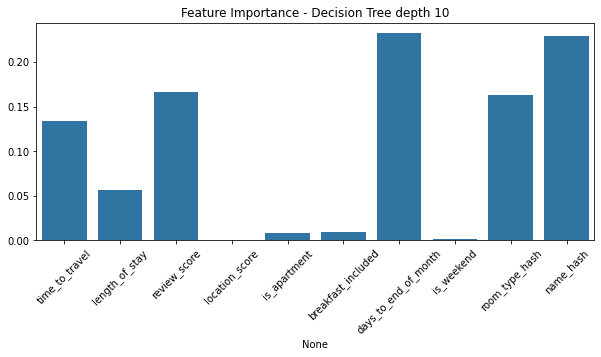

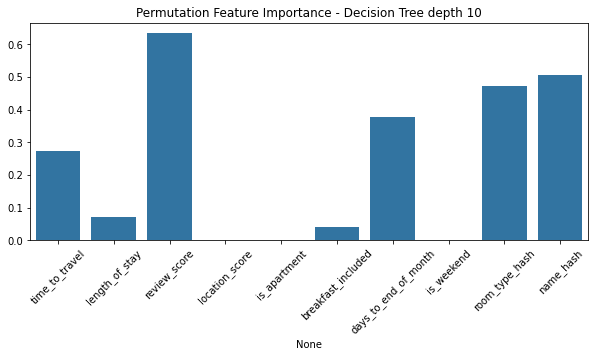

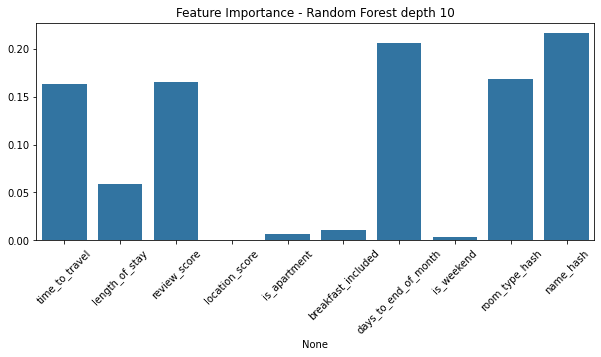

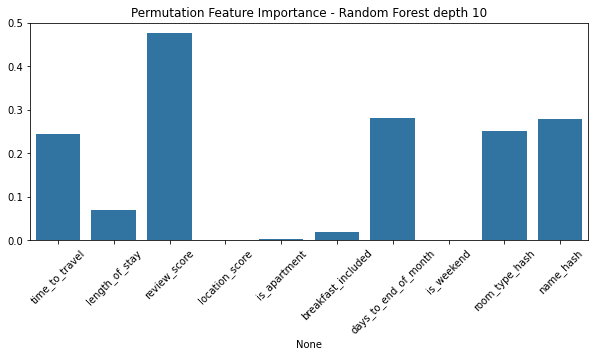

In [87]:
models_to_visualize_feature_impotrence = ['Decision Tree depth 10','Random Forest depth 10']
display_feature_importance(models_to_visualize_feature_impotrence[0])
display_permutation_importance(models_to_visualize_feature_impotrence[0])
display_feature_importance(models_to_visualize_feature_impotrence[1])
display_permutation_importance(models_to_visualize_feature_impotrence[1])

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


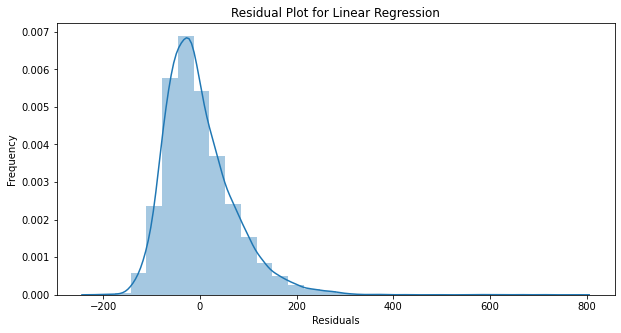

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


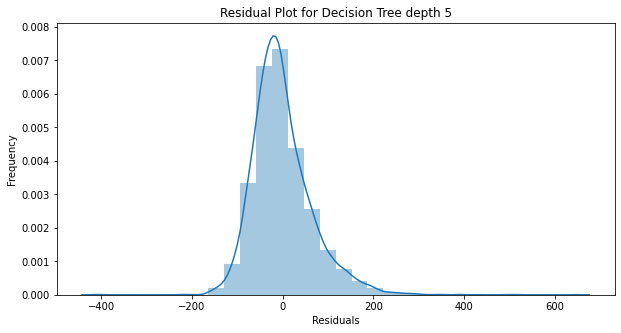

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


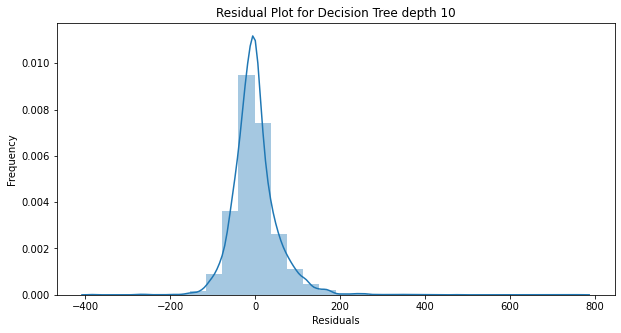

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


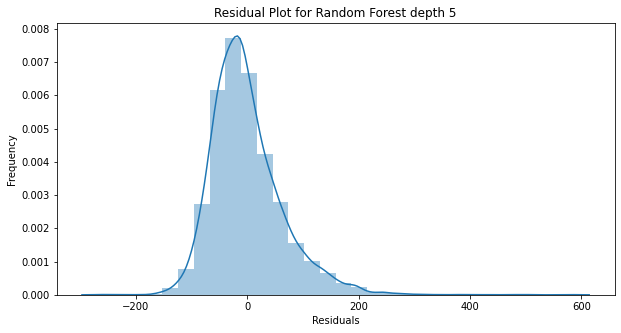

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


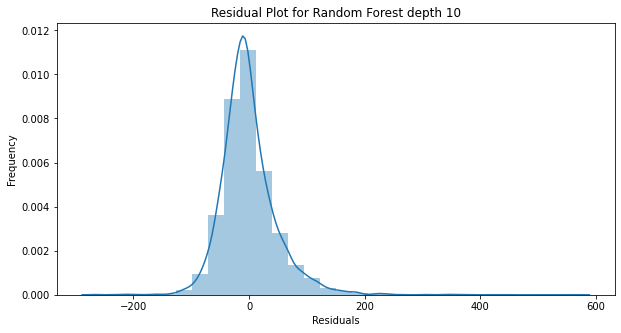

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


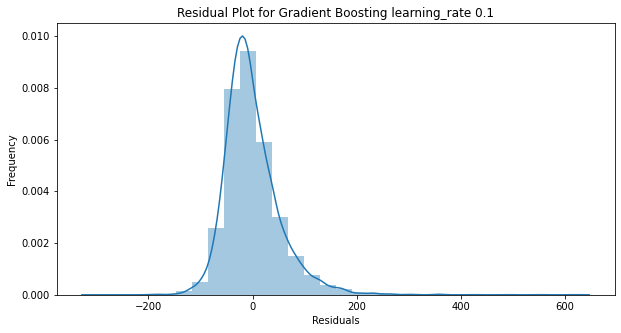

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


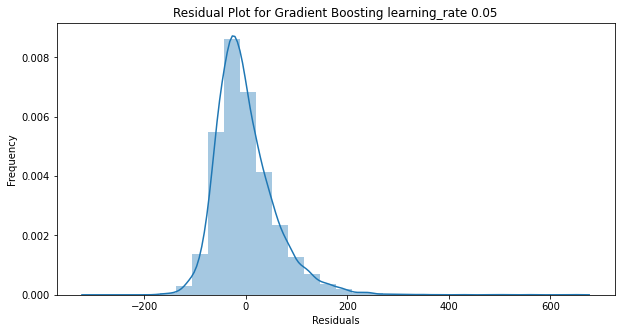

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


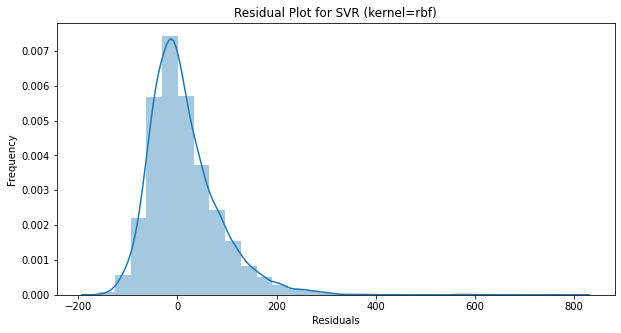

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1583615776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


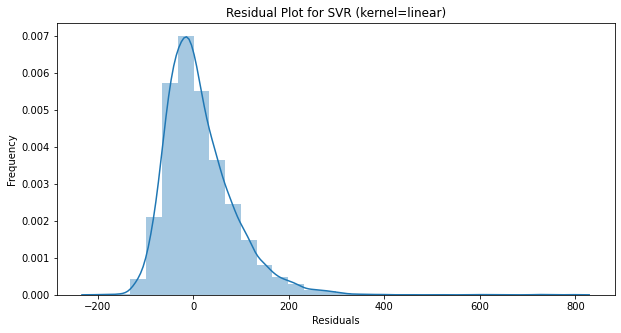

In [88]:
for name, model_copy in models.items():
    y_pred = model_copy.predict(X_test_scaled)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 5))
    sns.distplot(residuals, bins=30, kde=True)
    plt.title(f'Residual Plot for {name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Ilai\AppData\Local\Temp/ipykernel_18076/1404117669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30, kde=True)


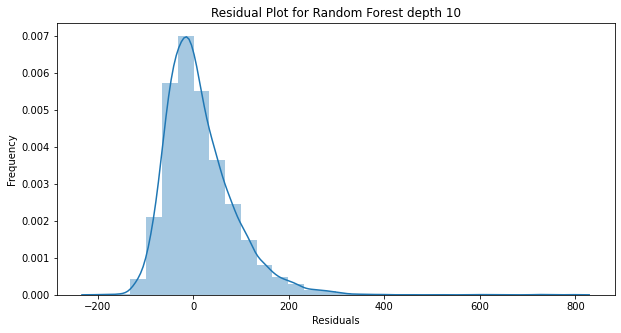

In [89]:
plt.figure(figsize=(10, 5))
sns.distplot(residuals, bins=30, kde=True)
plt.title(f'Residual Plot for {best_model_name}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



In [93]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Neural Network Model 1
class NeuralNet1(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet1, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Neural Network Model 2 with Embedding
class NeuralNet2(nn.Module):
    def __init__(self, input_dim, embedding_dim=8):
        super(NeuralNet2, self).__init__()
        
        # Embedding layer using a Linear transformation
        self.embedding = nn.Linear(input_dim, embedding_dim)
        self.batch_norm1 = nn.BatchNorm1d(embedding_dim)
        
        # Fully connected layers
        self.fc1 = nn.Linear(embedding_dim, 64)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.batch_norm3 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 1)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.embedding(x)
        x = self.batch_norm1(x)
        x = F.leaky_relu(x)  # Corrected function call

        x = self.fc1(x)
        x = self.batch_norm2(x)
        x = F.leaky_relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.batch_norm3(x)
        x = F.leaky_relu(x)

        x = self.fc3(x)
        return x

def train_model(model, train_loader, test_loader, epochs=50):
    criterion = nn.SmoothL1Loss()
    optimizer = optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-4)
    
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                y_pred = model(X_batch)
                val_loss += criterion(y_pred, y_batch).item()
        val_loss /= len(test_loader)
        print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")

# Train NeuralNet1
model1 = NeuralNet1(X_train_scaled.shape[1])
train_model(model1, train_loader, test_loader)

Epoch 1/50, Validation Loss: 55.0867
Epoch 2/50, Validation Loss: 53.4092
Epoch 3/50, Validation Loss: 52.8652
Epoch 4/50, Validation Loss: 52.6257
Epoch 5/50, Validation Loss: 52.2128
Epoch 6/50, Validation Loss: 52.0271
Epoch 7/50, Validation Loss: 51.7728
Epoch 8/50, Validation Loss: 51.5400
Epoch 9/50, Validation Loss: 51.3821
Epoch 10/50, Validation Loss: 51.1990
Epoch 11/50, Validation Loss: 51.0106
Epoch 12/50, Validation Loss: 50.8492
Epoch 13/50, Validation Loss: 50.7192
Epoch 14/50, Validation Loss: 50.5613
Epoch 15/50, Validation Loss: 50.3315
Epoch 16/50, Validation Loss: 50.1868
Epoch 17/50, Validation Loss: 49.9735
Epoch 18/50, Validation Loss: 49.7636
Epoch 19/50, Validation Loss: 49.5984
Epoch 20/50, Validation Loss: 49.4107
Epoch 21/50, Validation Loss: 49.2224
Epoch 22/50, Validation Loss: 49.0821
Epoch 23/50, Validation Loss: 49.0414
Epoch 24/50, Validation Loss: 48.7858
Epoch 25/50, Validation Loss: 48.6469
Epoch 26/50, Validation Loss: 48.5181
Epoch 27/50, Validati

In [94]:
# Train NeuralNet2
model2 = NeuralNet2(X_train_scaled.shape[1])
train_model(model2, train_loader, test_loader)

Epoch 1/50, Validation Loss: 217.5218
Epoch 2/50, Validation Loss: 179.6799
Epoch 3/50, Validation Loss: 130.5601
Epoch 4/50, Validation Loss: 77.2260
Epoch 5/50, Validation Loss: 56.0253
Epoch 6/50, Validation Loss: 53.4705
Epoch 7/50, Validation Loss: 53.2460
Epoch 8/50, Validation Loss: 53.1538
Epoch 9/50, Validation Loss: 52.7715
Epoch 10/50, Validation Loss: 52.9200
Epoch 11/50, Validation Loss: 52.7300
Epoch 12/50, Validation Loss: 52.5637
Epoch 13/50, Validation Loss: 52.5435
Epoch 14/50, Validation Loss: 52.7612
Epoch 15/50, Validation Loss: 52.6460
Epoch 16/50, Validation Loss: 52.6912
Epoch 17/50, Validation Loss: 52.2708
Epoch 18/50, Validation Loss: 52.1029
Epoch 19/50, Validation Loss: 52.4044
Epoch 20/50, Validation Loss: 52.1310
Epoch 21/50, Validation Loss: 52.0370
Epoch 22/50, Validation Loss: 51.8737
Epoch 23/50, Validation Loss: 51.6670
Epoch 24/50, Validation Loss: 51.8438
Epoch 25/50, Validation Loss: 51.8774
Epoch 26/50, Validation Loss: 52.2130
Epoch 27/50, Valid

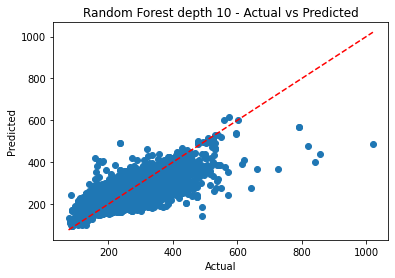

In [ ]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'{best_model_name} - Actual vs Predicted')
plt.show()

In [ ]:
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).numpy()
    
    # Scatter plot: Predictions vs Actual
    plt.figure()
    plt.scatter(y_test.numpy(), y_pred, alpha=0.5, color='blue')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # Identity line
    plt.show()

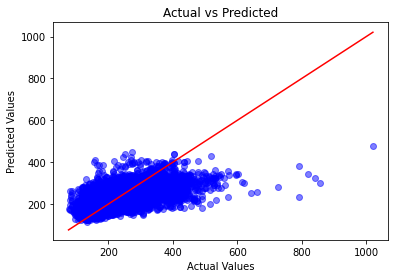

In [ ]:
evaluate_model(model1, X_test_tensor, y_test_tensor)

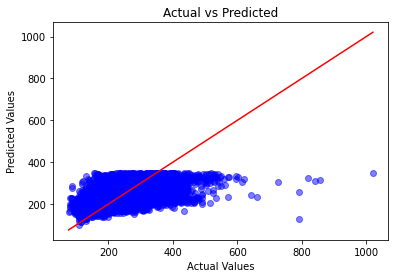

In [ ]:
evaluate_model(model2, X_test_tensor, y_test_tensor)

In [ ]:
X_train_25, X_test_25 = X[X['time_to_travel'] <= 25], X[X['time_to_travel'] > 25]
y_train_25, y_test_25 = y[X['time_to_travel'] <= 25], y[X['time_to_travel'] > 25]

# Re-train the best model and test
best_model.fit(X_train_25, y_train_25)
y_pred_25 = best_model.predict(X_test_25)

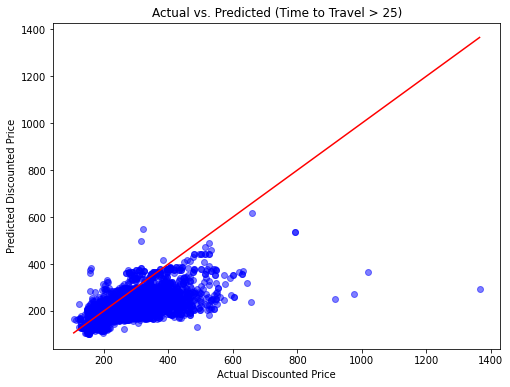

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_25, y_pred_25, alpha=0.5, color='blue')
plt.plot([y_test_25.min(), y_test_25.max()], [y_test_25.min(), y_test_25.max()], 'r')  # Identity line
plt.xlabel('Actual Discounted Price')
plt.ylabel('Predicted Discounted Price')
plt.title('Actual vs. Predicted (Time to Travel > 25)')
plt.show()